In [180]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

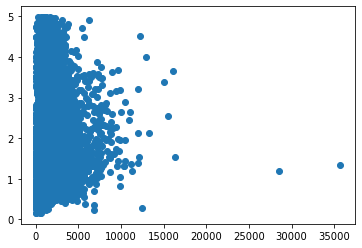

In [181]:
housing = datasets.fetch_california_housing()
X = housing.data
y = housing.target

X = X[y < 5]
y = y[y < 5]
plt.figure()
plt.scatter(X[:, 4], y)
plt.show()

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lin_reg = LinearRegression()

ridge_reg = Ridge()

lin_std_reg = Pipeline([
    ('std_scaler', StandardScaler()),
    ('lin_reg', LinearRegression())])

ridge_std_reg = Pipeline([
    ('std_scaler', StandardScaler()),
    ('ridge', Ridge())])

poly_reg = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('std_scaler', StandardScaler()),
    ('lin_reg', LinearRegression())])

poly_reg_reg = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('std_scaler', StandardScaler()),
    ('ridge', Ridge())])

regs = [lin_reg, ridge_reg, lin_std_reg, ridge_std_reg, poly_reg, poly_reg_reg]

for i in regs:
    scores = cross_val_score(i, X_train, y_train, cv=6)
    print('average score: %.8f' % (sum(scores) / len(scores)))
    print('mean: %.8f, std: %.8f' % (scores.mean(), scores.std()))

average score: 0.57483580
mean: 0.57483580, std: 0.00880346
average score: 0.57484834
mean: 0.57484834, std: 0.00876638
average score: 0.57483580
mean: 0.57483580, std: 0.00880346
average score: 0.57484049
mean: 0.57484049, std: 0.00877873
average score: -10.35464992
mean: -10.35464992, std: 22.41550567
average score: -19.76399321
mean: -19.76399321, std: 44.48465240


In [184]:
ridge_reg.fit(X_train, y_train)
print(f'test score: {ridge_reg.score(X_test, y_test)}')

test score: 0.5853782610625291


Since the ridge regression offers the highest average score and the lowest variance, the final model is chosen to use ridge regression to predict the result. The model gets 0.59 in the end.